In [122]:
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler


In [123]:
#Data reading
#Load train and test csv file
dengue_features_train = pd.read_csv('dataset/dengue_features_train.csv')
dengue_labels_train = pd.read_csv('dataset/dengue_labels_train.csv')
dengue_test = pd.read_csv("dataset/dengue_features_test.csv")

In [124]:
dengue_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [125]:

#Let's fusion the 2 dataframes:
#Merging the Train dataframe with the labels data frame 
dengue_train = pd.merge(dengue_labels_train, dengue_features_train, on=['city','year','weekofyear'])

dengue_train_sj = dengue_train[dengue_train.city == 'sj'].copy()
dengue_train_iq = dengue_train[dengue_train.city == 'iq'].copy()
dengue_test_sj = dengue_test[dengue_test.city == 'sj'].copy()
dengue_test_iq = dengue_test[dengue_test.city == 'iq'].copy()


In [126]:
dengue_train_sj.fillna(method='ffill', inplace=True)
dengue_train_iq.fillna(method='ffill', inplace=True)

dengue_test_sj.fillna(method='ffill', inplace=True)
dengue_test_iq.fillna(method='ffill', inplace=True)

In [127]:
#Check duplicate rows
np.sum(dengue_train_sj.duplicated())

0

In [128]:
dengue_train_sj.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [129]:
dengue_train_sj.drop("week_start_date",axis=1,inplace=True)
dengue_test_sj.drop("week_start_date",axis=1,inplace=True)
dengue_train_iq.drop("week_start_date",axis=1,inplace=True)
dengue_test_iq.drop("week_start_date",axis=1,inplace=True)

dengue_train_sj.drop("city",axis=1,inplace=True)
dengue_test_sj.drop("city",axis=1,inplace=True)
dengue_train_iq.drop("city",axis=1,inplace=True)
dengue_test_iq.drop("city",axis=1,inplace=True)

## SAN Juan

In [130]:
dengue_train_sj.head()

,year,weekofyear,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,4,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990,19,5,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990,20,4,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990,21,3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990,22,6,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [131]:
Target = dengue_train_sj["total_cases"]
Train = dengue_train_sj.drop("total_cases",axis=1)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(Train,Target,test_size=0.2,shuffle = False)

In [133]:
classifier = MLPRegressor(max_iter=10000)
parameters = [{'hidden_layer_sizes': [(100, ), (20, 30), (13, 13, 13)],'activation':['relu']}]

In [134]:
len(X_train)

748

In [135]:
clf = GridSearchCV(estimator=classifier,param_grid=parameters,cv = TimeSeriesSplit(n_splits=5))
clf.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'hidden_layer_sizes': [(100,), (20, 30), (13, 13, 13)], 'activation': ['relu']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [136]:
clf.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (13, 13, 13)}

In [137]:
y_true, y_pred = y_test, clf.predict(X_test).astype(int)

print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))

Mean Absolute Error(MAE): 28.904255


In [138]:
clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(100,),activation='relu',random_state=0)
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test).astype(int)
print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))

Mean Absolute Error(MAE): 22.643617


In [139]:
y_actual = []
for i in range(len(y_true)):
    y_actual.append(y_true[748+i])
y_true.head()

748    13
749    27
750    13
751    18
752    16
Name: total_cases, dtype: int64

In [140]:
y_actual[0:5]

[13, 27, 13, 18, 16]

Text(0.5, 1.0, 'San Juan Prediction')

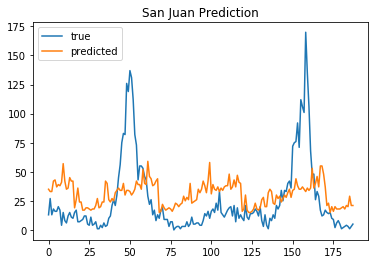

In [141]:
plt.plot(y_actual, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.title('San Juan Prediction')

In [142]:
y_train = dengue_train_sj['total_cases']
X_train = dengue_train_sj.drop(labels=['total_cases'], axis=1)
X_test = dengue_test_sj

In [143]:
clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(100,),activation='relu')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test).astype(int)

In [144]:

sub_df_sj = pd.DataFrame(y_pred, columns=["total_cases"])
sub_df_sj.insert(0, 'city', 'sj')
sub_df_sj.insert(1, 'year', dengue_test_sj['year'])
sub_df_sj.insert(2, 'weekofyear', dengue_test_sj['weekofyear'])
sub_df_sj.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,33
1,sj,2008,19,26
2,sj,2008,20,20
3,sj,2008,21,19
4,sj,2008,22,32


## Iqutos

In [145]:
X_train, X_test, y_train, y_test = train_test_split(dengue_train_iq,dengue_train_iq["total_cases"], test_size=0.2,shuffle=False)

classifier = MLPRegressor(max_iter=10000)
parameters = [{'hidden_layer_sizes': [(100, ), (20, 30), (13, 13, 13)],'activation':['relu']}]

clf = GridSearchCV(estimator=classifier,param_grid=parameters,cv = TimeSeriesSplit(n_splits=5))
clf.fit(X_train, y_train)
clf.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (13, 13, 13)}

In [146]:
len(X_test)

104

In [147]:
len(y_test)

104

In [148]:
y_true, y_pred = y_test, clf.predict(X_test).astype(int)
print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))

Mean Absolute Error(MAE): 42.673077


In [149]:
clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(13, 13, 13),activation='relu',random_state=0)
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test).astype(int)

print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))

Mean Absolute Error(MAE): 10.778846


In [150]:
y_pred,y_true = clf.predict(X_test).astype(int),y_test
y_actual = []
for i in range(len(y_true)):
    y_actual.append(y_true[1352+i])
y_actual[0:5]

[0, 3, 3, 1, 5]

Text(0.5, 1.0, 'Iquitos Juan Prediction')

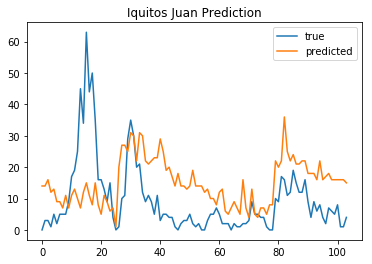

In [151]:
plt.plot(y_actual, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.title('Iquitos Juan Prediction')

In [152]:
y_train = dengue_train_iq['total_cases']
X_train = dengue_train_iq.drop(labels=['total_cases'], axis=1)
X_test = dengue_test_iq

clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(13, 13, 13),activation='relu',random_state=0)
clf.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [153]:
y_pred = clf.predict(X_test).astype(int)

In [154]:

sub_df_iq = pd.DataFrame(y_pred, columns=["total_cases"])
sub_df_iq.insert(0, 'city', 'iq')
sub_df_iq.insert(1, 'year', dengue_test_sj['year'])
sub_df_iq.insert(2, 'weekofyear', dengue_test_sj['weekofyear'])
sub_df_iq.head()

sub_df_iq.head()

,city,year,weekofyear,total_cases
0,iq,2008,18,7
1,iq,2008,19,5
2,iq,2008,20,8
3,iq,2008,21,7
4,iq,2008,22,6


In [155]:
y_pred[0:5]

array([7, 5, 8, 7, 6])

## Creating Submission Format

In [157]:
sub = sub_df_sj.append(sub_df_iq, ignore_index=True)
sub.to_csv('Submission.csv', index = False)

In [158]:
sub

,city,year,weekofyear,total_cases
0,sj,2008,18,33
1,sj,2008,19,26
2,sj,2008,20,20
3,sj,2008,21,19
4,sj,2008,22,32
5,sj,2008,23,25
6,sj,2008,24,34
7,sj,2008,25,19
8,sj,2008,26,23
9,sj,2008,27,20
